In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_train.csv")
df = df.drop(columns = ['Unnamed: 0'])



/Users/cassidylitch/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Requirement already up-to-date: scikit-learn in /Users/cassidylitch/anaconda/lib/python2.7/site-packages (0.20.0)


In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))



The scikit-learn version is 0.20.0.


In [8]:
# def non_shuffling_train_test_split(X, y, test_size=0.33):
#     i = int((1 - test_size) * X.shape[0]) + 1
#     X_train, X_test = np.split(X, [i])
#     y_train, y_test = np.split(y, [i])
#     return X_train, X_test, y_train, y_test

X_train, Locked_X, y_train, Locked_y = train_test_split(df.drop(columns = ['totals.transactionRevenue', 'class_pred', 'fullVisitorId']), df[['totals.transactionRevenue', 'class_pred', 'fullVisitorId']], test_size=0.33, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, shuffle = False)
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))
print("Locked_X: " + str(Locked_X.shape))
print("Locked_y: " + str(Locked_y.shape))


print("sum locked: ", sum(Locked_y['class_pred']))
print("sum train: ", sum(y_train['class_pred']))
print("sum test: ", sum(y_test['class_pred']))

X_train: (766871, 57)
X_test: (377714, 57)
y_train: (766871, 3)
y_test: (377714, 3)
Locked_X: (563752, 57)
Locked_y: (563752, 3)
('sum locked: ', 6247.0)
('sum train: ', 8406.0)
('sum test: ', 3861.0)


In [9]:
len(list(X_train))

57

# PCA graphs

In [14]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
pca3 = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])



[0.24886709 0.14881271 0.10975106]
0.507430863318883


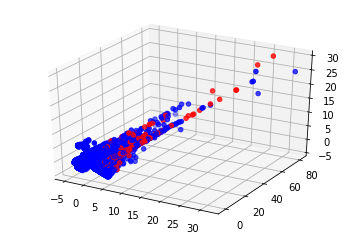

In [15]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')


ax.scatter(pca3['pc1'], pca3['pc2'], pca3['pc3'], c=list(y_train['class_pred']), cmap = 'bwr')

print pca.explained_variance_ratio_
print np.sum(pca.explained_variance_ratio_)

plt.show()

# PCA with 95% data

In [18]:
#PCA keeping 95% of variance
pca = PCA(.95)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.singular_values_)  



[1552.81098771 1200.75632511 1031.19128675  873.06689032  849.09972136
  555.84804885  546.88567088  528.94351139  495.55638516  450.3575826
  439.24008569  425.66397314  401.99561355  381.43843277  372.28267389
  365.01160136  356.12259497  348.600143    325.31897493  310.82613346
  263.56327102]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0, class_weight='balanced')
clf.fit(X_train_pca, y_train['class_pred'])
y_pred = clf.predict(X_test_pca)
confusion_matrix(y_test['class_pred'], y_pred)

array([[349609,  24244],
       [   138,   3723]])

In [33]:
X_train_pca.shape

(766873, 1)

In [25]:
#save the pca files
X_train_pca.dump("../X_train_pca.npk")
X_test_pca.dump("../X_test_pca.npk")
y_test.to_pickle("../y_test.pkl")
y_train.to_pickle("../y_train.pkl")

pandas.core.frame.DataFrame